<a href="https://colab.research.google.com/github/Ali-Saud/ML-in-PE/blob/master/Nestor_LSTM-18-aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [143]:
df = pd.read_csv('nasdaq-21-y.csv')
print(df.head())

         Date         Open         High  ...        Close    Adj Close      Volume
0  2000-08-16  3878.580078  3914.840088  ...  3861.199951  3861.199951  1401380000
1  2000-08-17  3858.879883  3947.050049  ...  3940.870117  3940.870117  1440370000
2  2000-08-18  3958.699951  3980.260010  ...  3930.340088  3930.340088  1447920000
3  2000-08-21  3966.229980  3985.620117  ...  3953.149902  3953.149902  1269330000
4  2000-08-22  3970.159912  4011.149902  ...  3958.209961  3958.209961  1413190000

[5 rows x 7 columns]


In [144]:
print(df.tail(15))

            Date          Open  ...     Adj Close      Volume
5267  2021-07-26  14821.030273  ...  14840.709961  4409960000
5268  2021-07-27  14807.950195  ...  14660.580078  4300000000
5269  2021-07-28  14715.660156  ...  14762.580078  4235390000
5270  2021-07-29  14771.169922  ...  14778.259766  3904590000
5271  2021-07-30  14615.849609  ...  14672.679688  3628750000
5272  2021-08-02  14758.599609  ...  14681.070313  3738200000
5273  2021-08-03  14713.990234  ...  14761.290039  4117520000
5274  2021-08-04  14747.209961  ...  14780.530273  4319400000
5275  2021-08-05  14794.080078  ...  14895.120117  4087320000
5276  2021-08-06  14864.219727  ...  14835.759766  4159050000
5277  2021-08-09  14855.759766  ...  14860.179688  4095760000
5278  2021-08-10  14887.750000  ...  14788.089844  3978790000
5279  2021-08-11  14834.379883  ...  14765.139648  3980530000
5280  2021-08-12  14751.360352  ...  14816.259766  4020260000
5281  2021-08-13  14825.070313  ...  14822.900391  4038130000

[15 row

In [145]:
cols = list(df)[1:6]
#Date and volume columns are not used in training. 
print(cols) #['Open', 'High', 'Low', 'Close', 'Adj Close']

['Open', 'High', 'Low', 'Close', 'Adj Close']


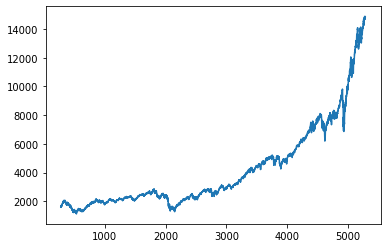

In [146]:
#New dataframe with only training data - 5 columns
df_for_training = df[cols].astype(float)

df_for_plot=df_for_training['Close'].tail(5000)
df_for_plot.plot.line()

#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [147]:
#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 5. We will make timesteps = 14 (past days data used for training). 

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 7  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (5275, 7, 5).
trainY shape == (5275, 1).


In [148]:
# define the Autoencoder model

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 7, 64)             17920     
_________________________________________________________________
lstm_9 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 30,369
Trainable params: 30,369
Non-trainable params: 0
_________________________________________________________________


Epoch 1/8
75/75 [==============================] - 3s 15ms/step - loss: 0.1316 - val_loss: 0.9257
Epoch 2/8
75/75 [==============================] - 1s 11ms/step - loss: 0.0189 - val_loss: 0.0460
Epoch 3/8
75/75 [==============================] - 1s 11ms/step - loss: 0.0160 - val_loss: 0.2023
Epoch 4/8
75/75 [==============================] - 1s 11ms/step - loss: 0.0157 - val_loss: 0.0105
Epoch 5/8
75/75 [==============================] - 1s 11ms/step - loss: 0.0145 - val_loss: 0.1129
Epoch 6/8
75/75 [==============================] - 1s 11ms/step - loss: 0.0151 - val_loss: 0.1083
Epoch 7/8
75/75 [==============================] - 1s 11ms/step - loss: 0.0144 - val_loss: 0.1424
Epoch 8/8
75/75 [==============================] - 1s 11ms/step - loss: 0.0151 - val_loss: 0.3860


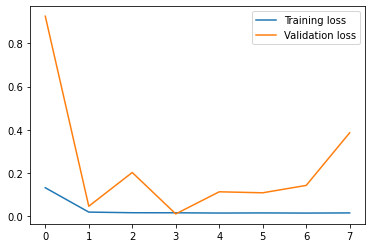

In [149]:
# fit the model
history = model.fit(trainX, trainY, epochs=8, batch_size=64, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [150]:
print(history.history['loss'])
#print(history.history['acc'])

[0.13163861632347107, 0.01888400875031948, 0.015962908044457436, 0.01568007841706276, 0.014479496516287327, 0.015072756446897984, 0.014357581734657288, 0.015077386982738972]


In [151]:
#Predicting...
#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).  
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
train_dates = pd.to_datetime(df['Date'])
#Remember that we can only predict one day in future as our model needs 5 variables
#as inputs for prediction. We only have all 5 variables until the last day in our dataset.
n_past = 10
n_days_for_prediction=30 #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

[Timestamp('2021-08-02 00:00:00', freq='C'), Timestamp('2021-08-03 00:00:00', freq='C'), Timestamp('2021-08-04 00:00:00', freq='C'), Timestamp('2021-08-05 00:00:00', freq='C'), Timestamp('2021-08-06 00:00:00', freq='C'), Timestamp('2021-08-09 00:00:00', freq='C'), Timestamp('2021-08-10 00:00:00', freq='C'), Timestamp('2021-08-11 00:00:00', freq='C'), Timestamp('2021-08-12 00:00:00', freq='C'), Timestamp('2021-08-13 00:00:00', freq='C'), Timestamp('2021-08-16 00:00:00', freq='C'), Timestamp('2021-08-17 00:00:00', freq='C'), Timestamp('2021-08-18 00:00:00', freq='C'), Timestamp('2021-08-19 00:00:00', freq='C'), Timestamp('2021-08-20 00:00:00', freq='C'), Timestamp('2021-08-23 00:00:00', freq='C'), Timestamp('2021-08-24 00:00:00', freq='C'), Timestamp('2021-08-25 00:00:00', freq='C'), Timestamp('2021-08-26 00:00:00', freq='C'), Timestamp('2021-08-27 00:00:00', freq='C'), Timestamp('2021-08-30 00:00:00', freq='C'), Timestamp('2021-08-31 00:00:00', freq='C'), Timestamp('2021-09-01 00:00:00'

In [152]:
q = pd.to_datetime(predict_period_dates)
q

DatetimeIndex(['2021-08-02', '2021-08-03', '2021-08-04', '2021-08-05',
               '2021-08-06', '2021-08-09', '2021-08-10', '2021-08-11',
               '2021-08-12', '2021-08-13', '2021-08-16', '2021-08-17',
               '2021-08-18', '2021-08-19', '2021-08-20', '2021-08-23',
               '2021-08-24', '2021-08-25', '2021-08-26', '2021-08-27',
               '2021-08-30', '2021-08-31', '2021-09-01', '2021-09-02',
               '2021-09-03', '2021-09-07', '2021-09-08', '2021-09-09',
               '2021-09-10', '2021-09-13'],
              dtype='datetime64[ns]', freq=None)

In [153]:
pred_dates = q
pred_dates[0]

Timestamp('2021-08-02 00:00:00')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


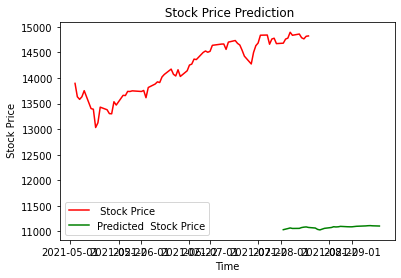

In [166]:
#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Close':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['Date', 'Close']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2021-5-1']

#sns.lineplot(original['Date'], original['Close'])
#sns.lineplot(df_forecast['Date'], df_forecast['Close'])

plt.plot(original['Date'], original['Close'], color = 'red', label = ' Stock Price')
plt.plot(df_forecast['Date'], df_forecast['Close'] , color = 'green', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [167]:
original.tail(65)

,Date,Close
5217,2021-05-13,13124.990234
5218,2021-05-14,13429.980469
5219,2021-05-17,13379.049805
5220,2021-05-18,13303.639648
5221,2021-05-19,13299.740234
...,...,...
5277,2021-08-09,14860.179688
5278,2021-08-10,14788.089844
5279,2021-08-11,14765.139648
5280,2021-08-12,14816.259766


In [168]:
df_forecast

,Date,Close
0,2021-08-02,11033.022461
1,2021-08-03,11044.124023
2,2021-08-04,11054.997070
3,2021-08-05,11067.173828
4,2021-08-06,11057.377930
5,2021-08-09,11058.800781
6,2021-08-10,11074.895508
7,2021-08-11,11082.909180
8,2021-08-12,11087.193359
9,2021-08-13,11077.110352


In [169]:
original_open = original['Close'].loc[original['Date'] >= '2021-08-02']
riginal_open = original['Close'].loc[original['Date'] <= '2021-09-13']
original_open = original_open.to_numpy()
original_open

array([14681.070313, 14761.290039, 14780.530273, 14895.120117,
       14835.759766, 14860.179688, 14788.089844, 14765.139648,
       14816.259766, 14822.900391])

In [158]:
#df_forecast_all = df_forecast
#df_forecast = df_forecast.loc[df_forecast['Date'] >='2021-08-02']
#df_forecast

In [170]:

df_forecast = df_forecast.loc[df_forecast['Date'] <='2021-08-13']
df_forecast

,Date,Close
0,2021-08-02,11033.022461
1,2021-08-03,11044.124023
2,2021-08-04,11054.997070
3,2021-08-05,11067.173828
4,2021-08-06,11057.377930
5,2021-08-09,11058.800781
6,2021-08-10,11074.895508
7,2021-08-11,11082.909180
8,2021-08-12,11087.193359
9,2021-08-13,11077.110352


In [160]:
13618.640625/14771.50

0.9219538046237687

In [161]:
13574.999023/14715.129883

0.9225198235377343

In [171]:
direction = []
a = 14821.030273
for i in df_forecast['Close']:
  if (i==a):
    dir = 'Neutral'
    #print(dir)
  if (i< a):
    dir = 'Down'
    #print(dir)
  else:
    dir = 'Up'
    #print(dir)
  a = i
  direction.append(dir)
direction
  

['Down', 'Up', 'Up', 'Up', 'Down', 'Up', 'Up', 'Up', 'Up', 'Down']

In [172]:
df_forecast['Actual Price'] = original_open
df_forecast

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Close,Actual Price
0,2021-08-02,11033.022461,14681.070313
1,2021-08-03,11044.124023,14761.290039
2,2021-08-04,11054.997070,14780.530273
3,2021-08-05,11067.173828,14895.120117
4,2021-08-06,11057.377930,14835.759766
5,2021-08-09,11058.800781,14860.179688
6,2021-08-10,11074.895508,14788.089844
7,2021-08-11,11082.909180,14765.139648
8,2021-08-12,11087.193359,14816.259766
9,2021-08-13,11077.110352,14822.900391


In [173]:
df_forecast['Direction']= direction
df_forecast

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Close,Actual Price,Direction
0,2021-08-02,11033.022461,14681.070313,Down
1,2021-08-03,11044.124023,14761.290039,Up
2,2021-08-04,11054.997070,14780.530273,Up
3,2021-08-05,11067.173828,14895.120117,Up
4,2021-08-06,11057.377930,14835.759766,Down
5,2021-08-09,11058.800781,14860.179688,Up
6,2021-08-10,11074.895508,14788.089844,Up
7,2021-08-11,11082.909180,14765.139648,Up
8,2021-08-12,11087.193359,14816.259766,Up
9,2021-08-13,11077.110352,14822.900391,Down


In [174]:
Accuracy = df_forecast['Close']/df_forecast['Actual Price']
Accuracy=np.array(Accuracy)
Accuracy

array([0.75151349, 0.74818149, 0.7479432 , 0.74300669, 0.74531929,
       0.74419025, 0.74890643, 0.75061323, 0.74831257, 0.74729709])

In [175]:
df_forecast['Accuracy'] = Accuracy
for i in Accuracy:
        if i > 1:
          z = 1/Accuracy
          df_forecast['Accuracy Inverse'] = (z)
          df_forecast

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [176]:
pred_first_dates = pd.to_datetime(predict_period_dates)
pred_first_dates

DatetimeIndex(['2021-08-02', '2021-08-03', '2021-08-04', '2021-08-05',
               '2021-08-06', '2021-08-09', '2021-08-10', '2021-08-11',
               '2021-08-12', '2021-08-13', '2021-08-16', '2021-08-17',
               '2021-08-18', '2021-08-19', '2021-08-20', '2021-08-23',
               '2021-08-24', '2021-08-25', '2021-08-26', '2021-08-27',
               '2021-08-30', '2021-08-31', '2021-09-01', '2021-09-02',
               '2021-09-03', '2021-09-07', '2021-09-08', '2021-09-09',
               '2021-09-10', '2021-09-13'],
              dtype='datetime64[ns]', freq=None)

In [177]:
original_open

array([14681.070313, 14761.290039, 14780.530273, 14895.120117,
       14835.759766, 14860.179688, 14788.089844, 14765.139648,
       14816.259766, 14822.900391])

In [181]:
df_forecast['Close'][0]

11033.022

In [183]:
actual_direction = []
#a = predict_period_dates[0]#14821.030273
a = df_forecast['Close'][0]
b = original_open[0]
for i in original_open:
  #print(i,a)
  if (i==bin):
    dir = 'Neutral'
    #print(dir)
  if (i< b):
    dir = 'Down'
    #print(dir)
  else:
    dir = 'Up'
    #print(dir)
  b = i
  actual_direction.append(dir)
actual_direction

['Up', 'Up', 'Up', 'Up', 'Down', 'Up', 'Down', 'Down', 'Up', 'Up']

In [184]:
df_forecast['Actual Direction'] = actual_direction
df_forecast

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Close,Actual Price,Direction,Accuracy,Actual Direction
0,2021-08-02,11033.022461,14681.070313,Down,0.751513,Up
1,2021-08-03,11044.124023,14761.290039,Up,0.748181,Up
2,2021-08-04,11054.997070,14780.530273,Up,0.747943,Up
3,2021-08-05,11067.173828,14895.120117,Up,0.743007,Up
4,2021-08-06,11057.377930,14835.759766,Down,0.745319,Down
5,2021-08-09,11058.800781,14860.179688,Up,0.744190,Up
6,2021-08-10,11074.895508,14788.089844,Up,0.748906,Down
7,2021-08-11,11082.909180,14765.139648,Up,0.750613,Down
8,2021-08-12,11087.193359,14816.259766,Up,0.748313,Up
9,2021-08-13,11077.110352,14822.900391,Down,0.747297,Up


In [ ]:
import math

In [185]:
up_counter = 0
down_counter = 0
direction_start_point = 0
direction_window = 5
length = math.floor(len(df_forecast)/direction_window)

#for i in range(0, length):
for i in range(direction_start_point,length ):
  if (df_forecast['Direction'][i] == 'Up'):
    up_counter = up_counter +1
    print('Up counts : ', up_counter)
  else:
    down_counter = down_counter + 1
    print('Down counts : ', down_counter)
if (len(df_forecast) - direction_start_point < direction_window):
  direction_window = len(df_forecast) - direction_start_point
  print('_______------------________________' , direction_window)
else:
  direction_start_point = direction_start_point + direction_window
  print('++++++++++++++++++++++++++++++++++++++' , direction_start_point)

NameError: ignored

# Direction Accuracy:



In [186]:
hits =0
misses=0
for i in range(1, len(df_forecast)):
  if (df_forecast['Direction'][i] == df_forecast['Actual Direction'][i]):
    hits = hits +1
    print('Hit', hits)
  else:
    misses = misses +1
    print('Miss', misses)
accuracy_overall = hits/(hits+misses)
print('Overall Accuracy :' , accuracy_overall)

Hit 1
Hit 2
Hit 3
Hit 4
Hit 5
Miss 1
Miss 2
Hit 6
Miss 3
Overall Accuracy : 0.6666666666666666


In [ ]:
a = 13618.640625/14771.50
b = 13666.833/ 14652.719727
c = 13674.233398/14330.459961

In [ ]:
a

In [ ]:
b

In [ ]:
c

In [ ]:
#samples_to_predict = ['2021-07-21']
# Convert into Numpy array
#samples_to_predict = np.array(samples_to_predict)

# Generate predictions for samples
#predictions = model.predict(trainX[samples_to_predict:])
#print(predictions)